# Importing the libraries

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets

In [2]:
# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [3]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
iris_df["target"] = iris.target

In [7]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Visualization

[Text(0, 0, 'sepal length (cm)'),
 Text(1, 0, 'sepal width (cm)'),
 Text(2, 0, 'petal length (cm)'),
 Text(3, 0, 'petal width (cm)'),
 Text(4, 0, 'target')]

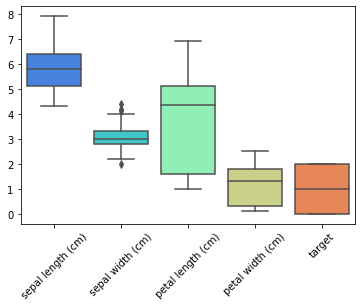

In [17]:
chart = sns.boxplot(data=iris_df, palette="rainbow")
chart.set_xticklabels(chart.get_xticklabels(),rotation=45)

<AxesSubplot:>

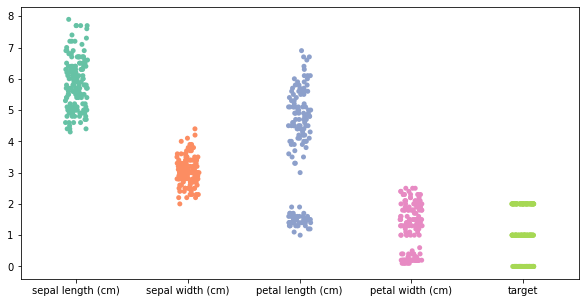

In [31]:
plt.figure(figsize=(10,5))
sns.stripplot(data=iris_df, palette = 'Set2', size = 5)

In [32]:
iris_df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


<AxesSubplot:>

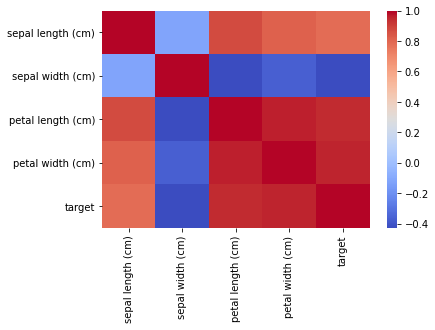

In [36]:
sns.heatmap(iris_df.corr(), cmap = 'coolwarm')

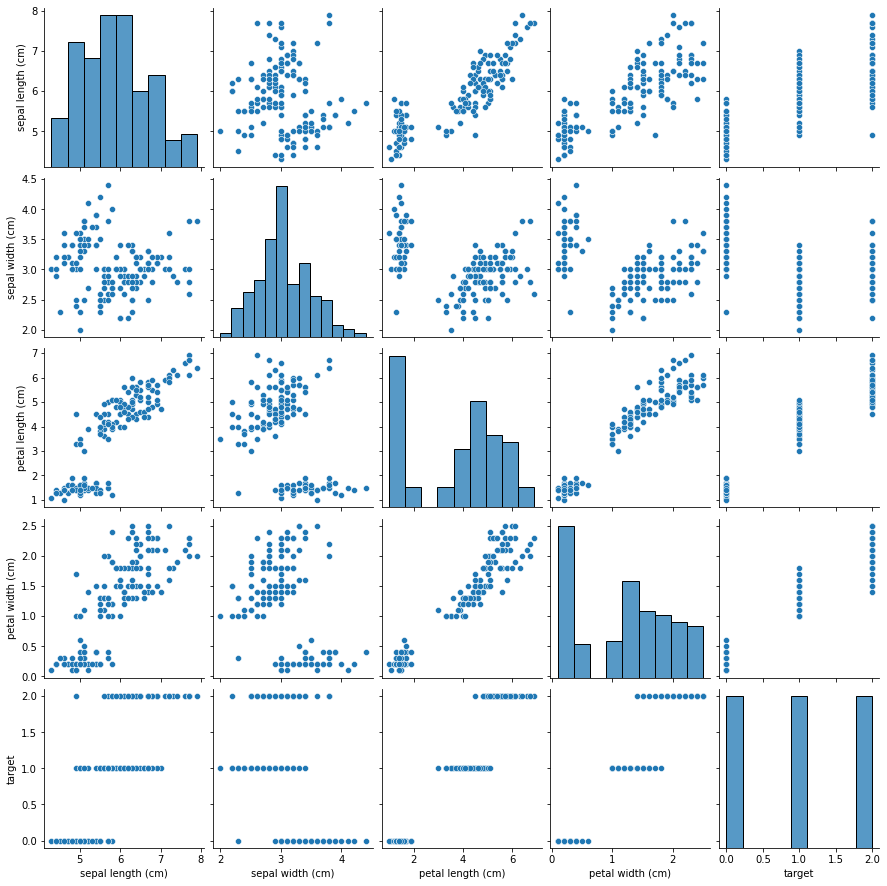

In [40]:
sns.pairplot(iris_df)

# Modelling

In [48]:
from sklearn.model_selection import train_test_split
x =  iris_df.drop('target',axis=1)
y =  iris_df['target']
X_train, X_test, y_train, y_test =  train_test_split(x,y,test_size = 0.30, random_state = 3)

In [49]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

print('Decision Tree Classifer Created')

Decision Tree Classifer Created


In [51]:
pred_ = model.predict(X_test)

In [52]:
from sklearn.metrics import classification_report, confusion_matrix

In [53]:
print(classification_report(y_test,pred_))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.93      0.96        14
           2       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [55]:
print(confusion_matrix(y_test,pred_))

[[17  0  0]
 [ 0 13  1]
 [ 0  0 14]]


In [56]:
from sklearn import tree

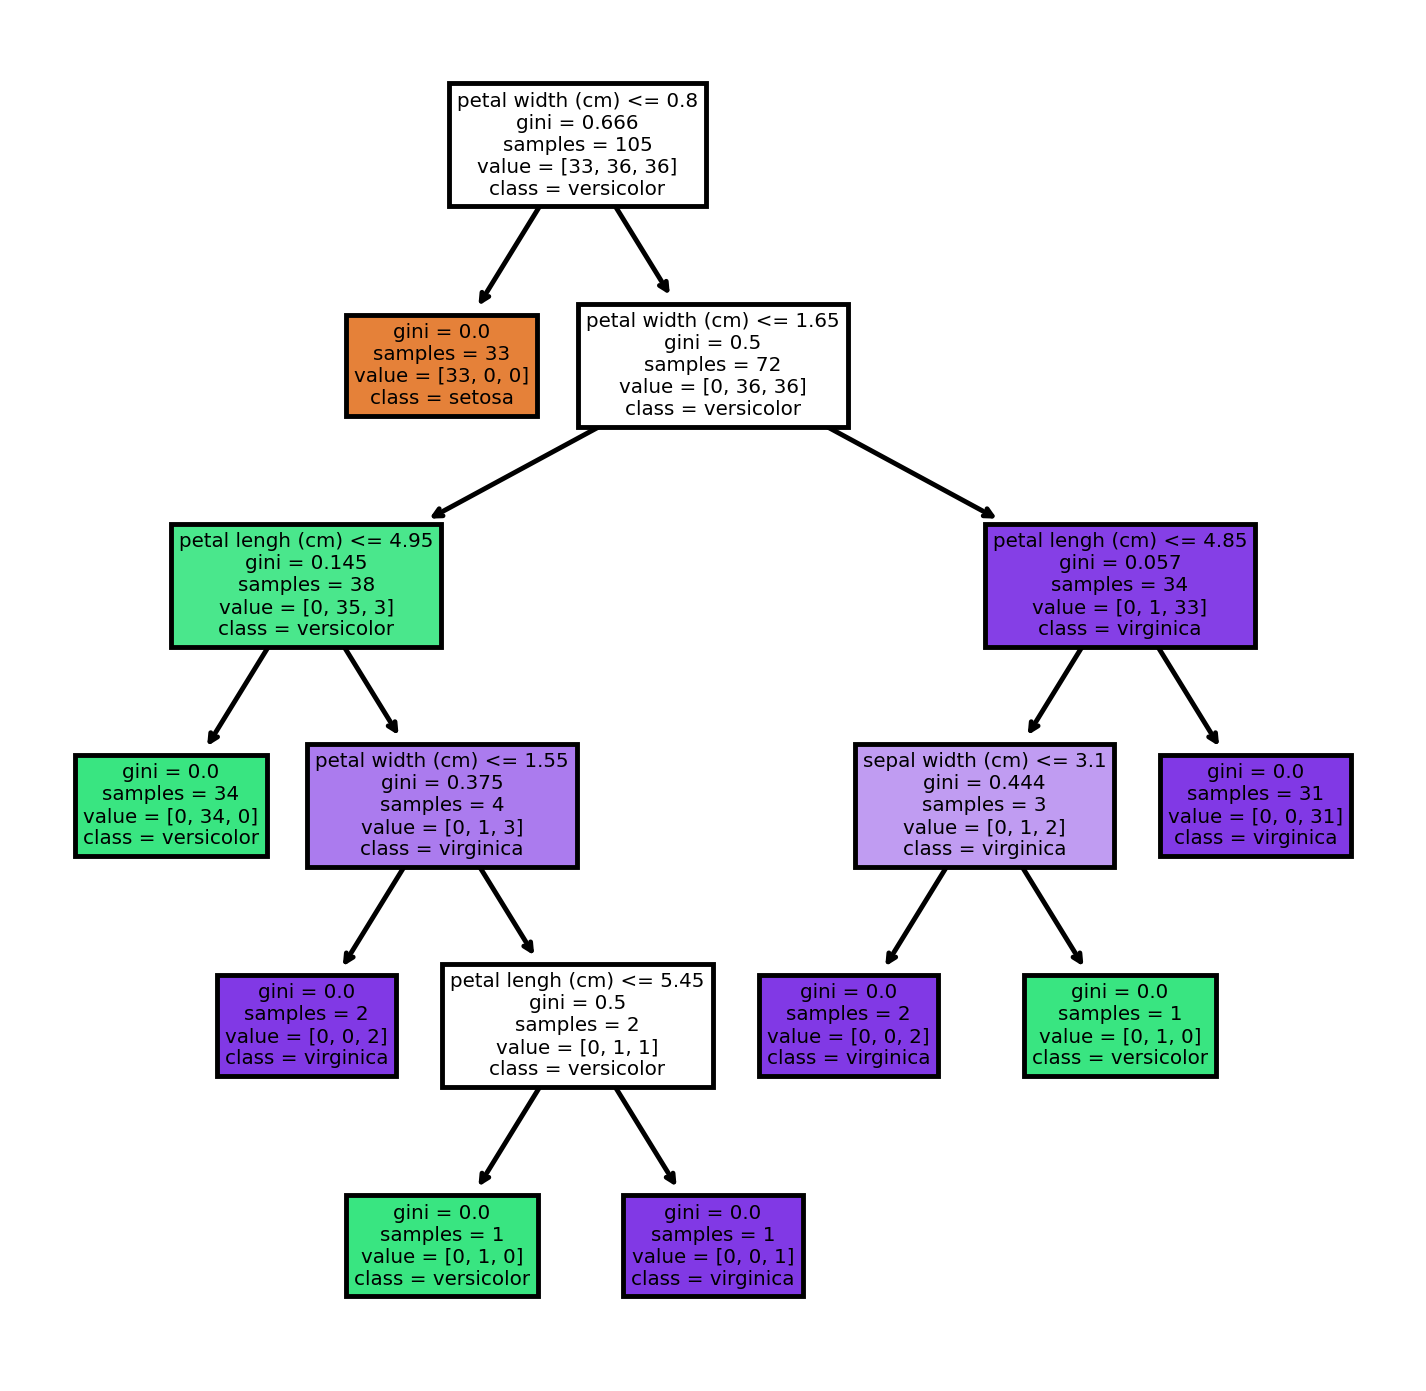

In [58]:
feat_names = ['sepal length (cm)','sepal width (cm)','petal lengh (cm)','petal width (cm)']
classes = ['setosa','versicolor','virginica']
fig, axes = plt.subplots(nrows =1,ncols = 1,figsize = (5,5),dpi=350)
tree.plot_tree(model,feature_names = feat_names,class_names=classes,filled=True);